## Qn 1
## Name: James Morillo
## Matric: U1740375H

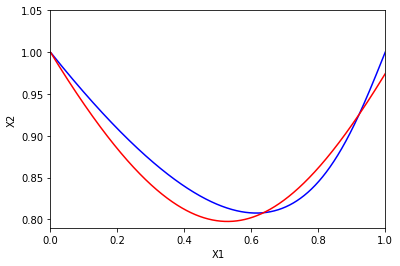

The gradient (in BLUE) of the X1(RK4) vs X1(EXACT solution) is 2.140577
The gradient (IN RED) of the X2(RK4) vs X2(EXACT solution) is 2.413872


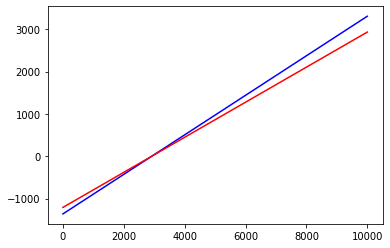

In [5]:
"""
Created on Wed Nov 13 16:16:44 2019
@author: jameselijah
Runge-Kutta 4 method
"""
import sys
import traceback
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import numpy as np


class RK4:
    DT            = 1e-3   # Differential interval
    STEP          = 100000   # Time step count
    X_1, X_2 = 0, 1  # Initial values of x1, x2
    def __init__(self):
        self.res = [[], []]
    def exec(self):
        try: #RK4 main algorithm
            xyz = [self.X_1, self.X_2]
            for _ in range(self.STEP):
                k_0 = self.__linearODE(xyz)
                k_1 = self.__linearODE([x + k * self.DT / 2 for x, k in zip(xyz, k_0)])
                k_2 = self.__linearODE([x + k * self.DT / 2 for x, k in zip(xyz, k_1)])
                k_3 = self.__linearODE([x + k * self.DT for x, k in zip(xyz, k_2)])
                for i in range(2):
                    xyz[i] += (k_0[i] + 2 * k_1[i] + 2 * k_2[i] + k_3[i]) \
                            * self.DT / 6.0
                    self.res[i].append(xyz[i])
            """
            ============================================================================================================================================================== 
            Below gives the RK4 result            
            
            The reason why i plot X2 against X1 is because i keep getting
            weird result when i discretize t which does not tally to the 
            correct result, hence for more accurate reading i plotted X2 against X1.
            ==============================================================================================================================================================
            """
            plt.plot(self.res[0], self.res[1],'b')
            plt.xlabel("X1")
            plt.ylabel("X2")
            
            """
            ============================================================================================================================================================== 
            Below gives the EXACT result
            ==============================================================================================================================================================
            """
            x1 = []
            for i in np.linspace(0,10, 10000): #make use of small time variation to 0.01
                temp = (-21*math.exp(-3*i))/40 + (1/12)*(math.exp(-i)) + 3*(math.exp(i))/8 + math.exp(i)/15
                x1.append(temp)
            
            x2 = []
            for i in np.linspace(0,10, 10000):
                temp2 = (21*math.exp(-3*i))/40 + (1/12)*(math.exp(-i)) + (math.exp(i))/8 + 4*math.exp(i)/15
                x2.append(temp2)
                
            plt.plot(x1,x2, 'r')
            plt.xlim([0,1])
            plt.ylim([0.79,1.05])
            plt.show()
            
            """
            ==============================================================================================================================================================
            The snippet below is ABS(RK4 x1 value - Exact solution x1 value)
            ==============================================================================================================================================================
            """
            
            x1_RK4 = self.res[0]
            
            difference_idealtoresultx1 = []
            for i in range(0,10000):
                temp = np.abs(x1[i] - x1_RK4[i])
                difference_idealtoresultx1.append(temp)
            x1_len = [i for i in range(len(difference_idealtoresultx1))]
            
            plt.plot(np.unique(x1_len), np.poly1d(np.polyfit(x1_len, difference_idealtoresultx1, 1))(np.unique(x1_len)),'b')
            
            gradient1 = np.gradient(np.unique(x1_len), np.poly1d(np.polyfit(x1_len, difference_idealtoresultx1, 1))(np.unique(x1_len))) 
            
            """GRADIENT is OBTAINED TO FIND THE ACCURACY, IN THIS CASE IT IS 2.14 and is a best of a curved line. 
            TO see non best fitted line, remove HAX on line 93. The Time scale has been stretched such that towards large time(t), 
            the deviation becomes too large due to the exponential exp(2t)"""
            
            print("The gradient (in BLUE) of the X1(RK4) vs X1(EXACT solution) is %f" % gradient1[0])
            #plt.plot(x_len,difference_idealtoresult, 'r')
            """
            ==============================================================================================================================================================
            The snippet below is ABS(RK4 x2 value - exactsolution x2 value)            
            ==============================================================================================================================================================
            """
            x2_RK4 = self.res[1]
            difference_idealtoresultx2 = []
            
            for i in range(0,10000):
                temp = np.abs(x2[i] - x2_RK4[i])
                difference_idealtoresultx2.append(temp)
            x2_len = [i for i in range(len(difference_idealtoresultx2))] #time discretisation
            
            plt.plot(np.unique(x2_len), np.poly1d(np.polyfit(x2_len, difference_idealtoresultx2, 1))(np.unique(x2_len)), 'r')
            gradient2 = np.gradient(np.unique(x2_len), np.poly1d(np.polyfit(x2_len, difference_idealtoresultx2, 1))(np.unique(x2_len))) 
            print("The gradient (IN RED) of the X2(RK4) vs X2(EXACT solution) is %f" % gradient2[0])
            #plt.plot(x2_len,difference_idealtoresultx2, 'r')
        except Exception as e:
            raise

    def __linearODE(self, xyz, DT = 1e-4):
        try:
            return [
                    -2*xyz[0] + xyz[1] + math.exp(DT), #main equation
                    xyz[0]-2*xyz[1]+math.exp(2*DT)]
        except Exception as e:
            raise
            
if __name__ == '__main__':
    try:
        obj = RK4()
        obj.exec()
    except Exception as e:
        traceback.print_exc()
        sys.exit(1)

In [9]:
#The huge difference gradient might possibly be because of the exponential term for very large N